In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("credit.csv")

In [3]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [4]:
print(f"Data has {df.shape[0]} rows and {df.shape[1]} columns")

Data has 1000 rows and 17 columns


In [5]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [7]:
catCol = []
numCol = []
for i in df.columns:
    if df[i].dtype == 'object':
        catCol.append(i)
    else:
        numCol.append(i)

In [8]:
print("Categorical Columns: ", catCol)
print("Numerical Columns: ", numCol)

Categorical Columns:  ['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_duration', 'other_credit', 'housing', 'job', 'phone', 'default']
Numerical Columns:  ['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents']


In [9]:
df[catCol].describe().T

,count,unique,top,freq
checking_balance,1000,4,unknown,394
credit_history,1000,5,good,530
purpose,1000,6,furniture/appliances,473
savings_balance,1000,5,< 100 DM,603
employment_duration,1000,5,1 - 4 years,339
other_credit,1000,3,none,814
housing,1000,3,own,713
job,1000,4,skilled,630
phone,1000,2,no,596
default,1000,2,no,700


In [10]:
df[numCol].describe().T

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [11]:
for i in catCol:
    print(i)
    print(df[i].value_counts())
    print("\n")

checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64


credit_history
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64


purpose
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64


savings_balance
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64


employment_duration
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64


other_credit
none     814
bank     139
store     47
Name: other_credit, dtype: int64


housing
own      713
rent     179
other    108
Name: housing, dtype: int64


job
skilled       630
unskilled     200
managemen

In [12]:
df['purpose'] = df['purpose'].replace("car0", "car")
df['savings_balance'] = df['savings_balance'].replace("> 1000 DM", "500 - 1000 DM")
df['savings_balance'] = df['savings_balance'].replace("500 - 1000 DM", "> 500 DM")

In [13]:
for i in catCol:
    print(i, df[i].nunique())
    print(df[i].value_counts())
    print("\n")

checking_balance 4
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64


credit_history 5
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64


purpose 5
furniture/appliances    473
car                     349
business                 97
education                59
renovations              22
Name: purpose, dtype: int64


savings_balance 4
< 100 DM        603
unknown         183
> 500 DM        111
100 - 500 DM    103
Name: savings_balance, dtype: int64


employment_duration 5
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64


other_credit 3
none     814
bank     139
store     47
Name: other_credit, dtype: int64


housing 3
own      713
rent     179
other    108
Name: housing, dtype: int64


job 4
skilled       630
unskilled     200
management    148
unemployed     22
Name: job,

In [14]:
for i in numCol:
    print(i, df[i].nunique())
    print(df[i].value_counts())
    print("\n")

months_loan_duration 33
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: months_loan_duration, dtype: int64


amount 921
1478    3
1262    3
1258    3
1275    3
1393    3
       ..
1459    1
882     1
3758    1
1136    1
4576    1
Name: amount, Length: 921, dtype: int64


percent_of_income 4
4    476
2    231
3    157
1    136
Name: percent_of_income, dtype: int64


years_at_residence 4
4    413
2    308
3    149
1    130
Name: years_at_residence, dtype: int64


age 53
27    51
26    50
23    48
24    44
28    43
25    41
30    40
35    40
36    39
31    38
29    37
32    34
33    33
34    32
37    29
22    27
40    25
38    24
42    22
39    21
46    18
43    17
47    17
44    17
41    17
45    15
20   

# Exploratory Data Analysis

In [15]:
df[numCol].skew(axis = 0, skipna = True)

months_loan_duration    1.094184
amount                  1.949628
percent_of_income      -0.531348
years_at_residence     -0.272570
age                     1.020739
existing_loans_count    1.272576
dependents              1.909445
dtype: float64

In [16]:
# Null / Missing Value Treatment
df.isna().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

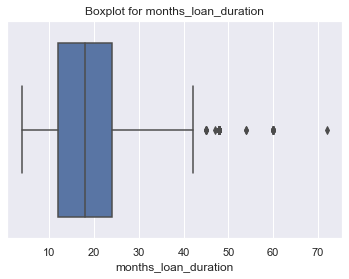

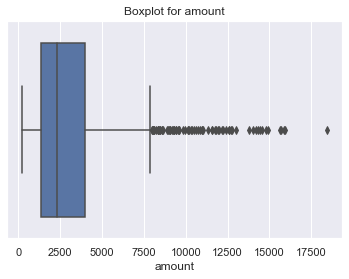

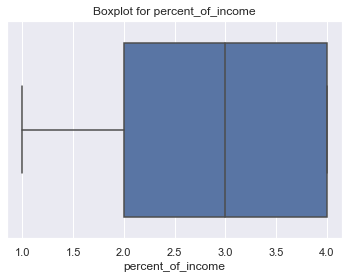

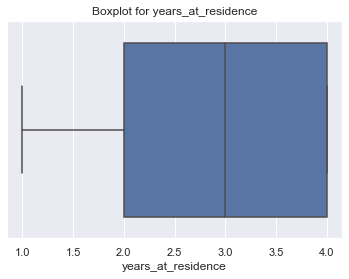

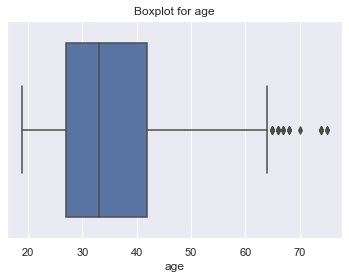

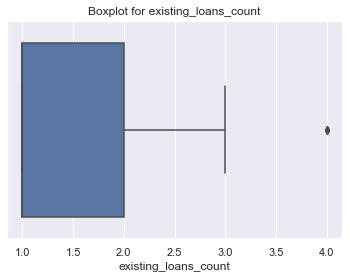

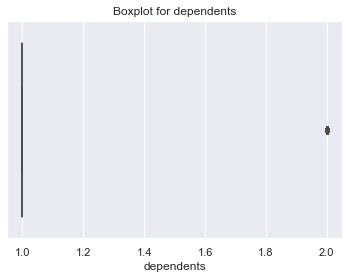

In [17]:
# Outlier Analysis
for i in numCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=i, data=df)
    plt.plot()
    plt.title(f"Boxplot for {i}")
    plt.show()

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(pd.DataFrame([Q1, Q3, IQR]).T)
print("\n")
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

                        0.25     0.75  Unnamed 0
months_loan_duration    12.0    24.00      12.00
amount                1365.5  3972.25    2606.75
percent_of_income        2.0     4.00       2.00
years_at_residence       2.0     4.00       2.00
age                     27.0    42.00      15.00
existing_loans_count     1.0     2.00       1.00
dependents               1.0     1.00       0.00




/var/folders/vg/knv8k4t949gbhzdyb1nl_p180000gn/T/ipykernel_48847/4263931928.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


age                      23
amount                   72
checking_balance          0
credit_history            0
default                   0
dependents              155
employment_duration       0
existing_loans_count      6
housing                   0
job                       0
months_loan_duration     70
other_credit              0
percent_of_income         0
phone                     0
purpose                   0
savings_balance           0
years_at_residence        0
dtype: int64

In [19]:
for i in ['months_loan_duration', 'amount', 'age']:
    print(i)
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    print(q1, q3, iqr, lower_limit, upper_limit)
  
    df[i] = np.where(df[i] > upper_limit, upper_limit,
                  np.where(df[i] < lower_limit, lower_limit,
                      df[i]))

months_loan_duration
12.0 24.0 12.0 -6.0 42.0
amount
1365.5 3972.25 2606.75 -2544.625 7882.375
age
27.0 42.0 15.0 4.5 64.5


In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

/var/folders/vg/knv8k4t949gbhzdyb1nl_p180000gn/T/ipykernel_48847/3214665925.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


age                       0
amount                    0
checking_balance          0
credit_history            0
default                   0
dependents              155
employment_duration       0
existing_loans_count      6
housing                   0
job                       0
months_loan_duration      0
other_credit              0
percent_of_income         0
phone                     0
purpose                   0
savings_balance           0
years_at_residence        0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   checking_balance      1000 non-null   object 
 1   months_loan_duration  1000 non-null   float64
 2   credit_history        1000 non-null   object 
 3   purpose               1000 non-null   object 
 4   amount                1000 non-null   float64
 5   savings_balance       1000 non-null   object 
 6   employment_duration   1000 non-null   object 
 7   percent_of_income     1000 non-null   int64  
 8   years_at_residence    1000 non-null   int64  
 9   age                   1000 non-null   float64
 10  other_credit          1000 non-null   object 
 11  housing               1000 non-null   object 
 12  existing_loans_count  1000 non-null   int64  
 13  job                   1000 non-null   object 
 14  dependents            1000 non-null   int64  
 15  phone                 

In [22]:
labelMapDict = {}
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in catCol:
    le.fit(df[i])
    labelMapDict[i] = list(le.classes_)
    print(i, list(le.classes_))

print(labelMapDict)

checking_balance ['1 - 200 DM', '< 0 DM', '> 200 DM', 'unknown']
credit_history ['critical', 'good', 'perfect', 'poor', 'very good']
purpose ['business', 'car', 'education', 'furniture/appliances', 'renovations']
savings_balance ['100 - 500 DM', '< 100 DM', '> 500 DM', 'unknown']
employment_duration ['1 - 4 years', '4 - 7 years', '< 1 year', '> 7 years', 'unemployed']
other_credit ['bank', 'none', 'store']
housing ['other', 'own', 'rent']
job ['management', 'skilled', 'unemployed', 'unskilled']
phone ['no', 'yes']
default ['no', 'yes']
{'checking_balance': ['1 - 200 DM', '< 0 DM', '> 200 DM', 'unknown'], 'credit_history': ['critical', 'good', 'perfect', 'poor', 'very good'], 'purpose': ['business', 'car', 'education', 'furniture/appliances', 'renovations'], 'savings_balance': ['100 - 500 DM', '< 100 DM', '> 500 DM', 'unknown'], 'employment_duration': ['1 - 4 years', '4 - 7 years', '< 1 year', '> 7 years', 'unemployed'], 'other_credit': ['bank', 'none', 'store'], 'housing': ['other', 'o

In [23]:
df['checking_balance'] = df['checking_balance'].replace({'1 - 200 DM':2, '< 0 DM':1, '> 200 DM':3, 'unknown':0})
df['credit_history'] = df['credit_history'].replace({'critical':0, 'good':2, 'perfect':4, 'poor':1, 'very good':3})
df['savings_balance'] = df['savings_balance'].replace({'100 - 500 DM':2, '< 100 DM':1, '> 500 DM':3, 'unknown':0})
df['employment_duration'] = df['employment_duration'].replace({'1 - 4 years':2, '4 - 7 years':3, '< 1 year':1, '> 7 years':4, 'unemployed':0})
df['job'] = df['job'].replace({'management':3, 'skilled':2, 'unemployed':1, 'unskilled':0})


In [25]:
labelMapDict = {}
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in catCol:
    df[i] = le.fit_transform(df[i])
    labelMapDict[i] = list(le.classes_)
    print(list(le.classes_))

print(labelMapDict)

[0, 1, 2, 3]
[0, 1, 2, 3, 4]
['business', 'car', 'education', 'furniture/appliances', 'renovations']
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
['bank', 'none', 'store']
['other', 'own', 'rent']
[0, 1, 2, 3]
['no', 'yes']
['no', 'yes']
{'checking_balance': [0, 1, 2, 3], 'credit_history': [0, 1, 2, 3, 4], 'purpose': ['business', 'car', 'education', 'furniture/appliances', 'renovations'], 'savings_balance': [0, 1, 2, 3], 'employment_duration': [0, 1, 2, 3, 4], 'other_credit': ['bank', 'none', 'store'], 'housing': ['other', 'own', 'rent'], 'job': [0, 1, 2, 3], 'phone': ['no', 'yes'], 'default': ['no', 'yes']}


In [26]:
labelMapDict

{'checking_balance': [0, 1, 2, 3],
 'credit_history': [0, 1, 2, 3, 4],
 'purpose': ['business',
  'car',
  'education',
  'furniture/appliances',
  'renovations'],
 'savings_balance': [0, 1, 2, 3],
 'employment_duration': [0, 1, 2, 3, 4],
 'other_credit': ['bank', 'none', 'store'],
 'housing': ['other', 'own', 'rent'],
 'job': [0, 1, 2, 3],
 'phone': ['no', 'yes'],
 'default': ['no', 'yes']}

In [27]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1,6.0,0,3,1169.0,0,4,4,4,64.5,1,1,2,2,1,1,0
1,2,42.0,2,3,5951.0,1,2,2,2,22.0,1,1,1,2,1,0,1
2,0,12.0,0,2,2096.0,1,3,2,3,49.0,1,1,1,0,2,0,0
3,1,42.0,2,3,7882.0,1,3,2,4,45.0,1,0,1,2,2,0,0
4,1,24.0,1,1,4870.0,1,2,3,4,53.0,1,0,2,2,2,0,1


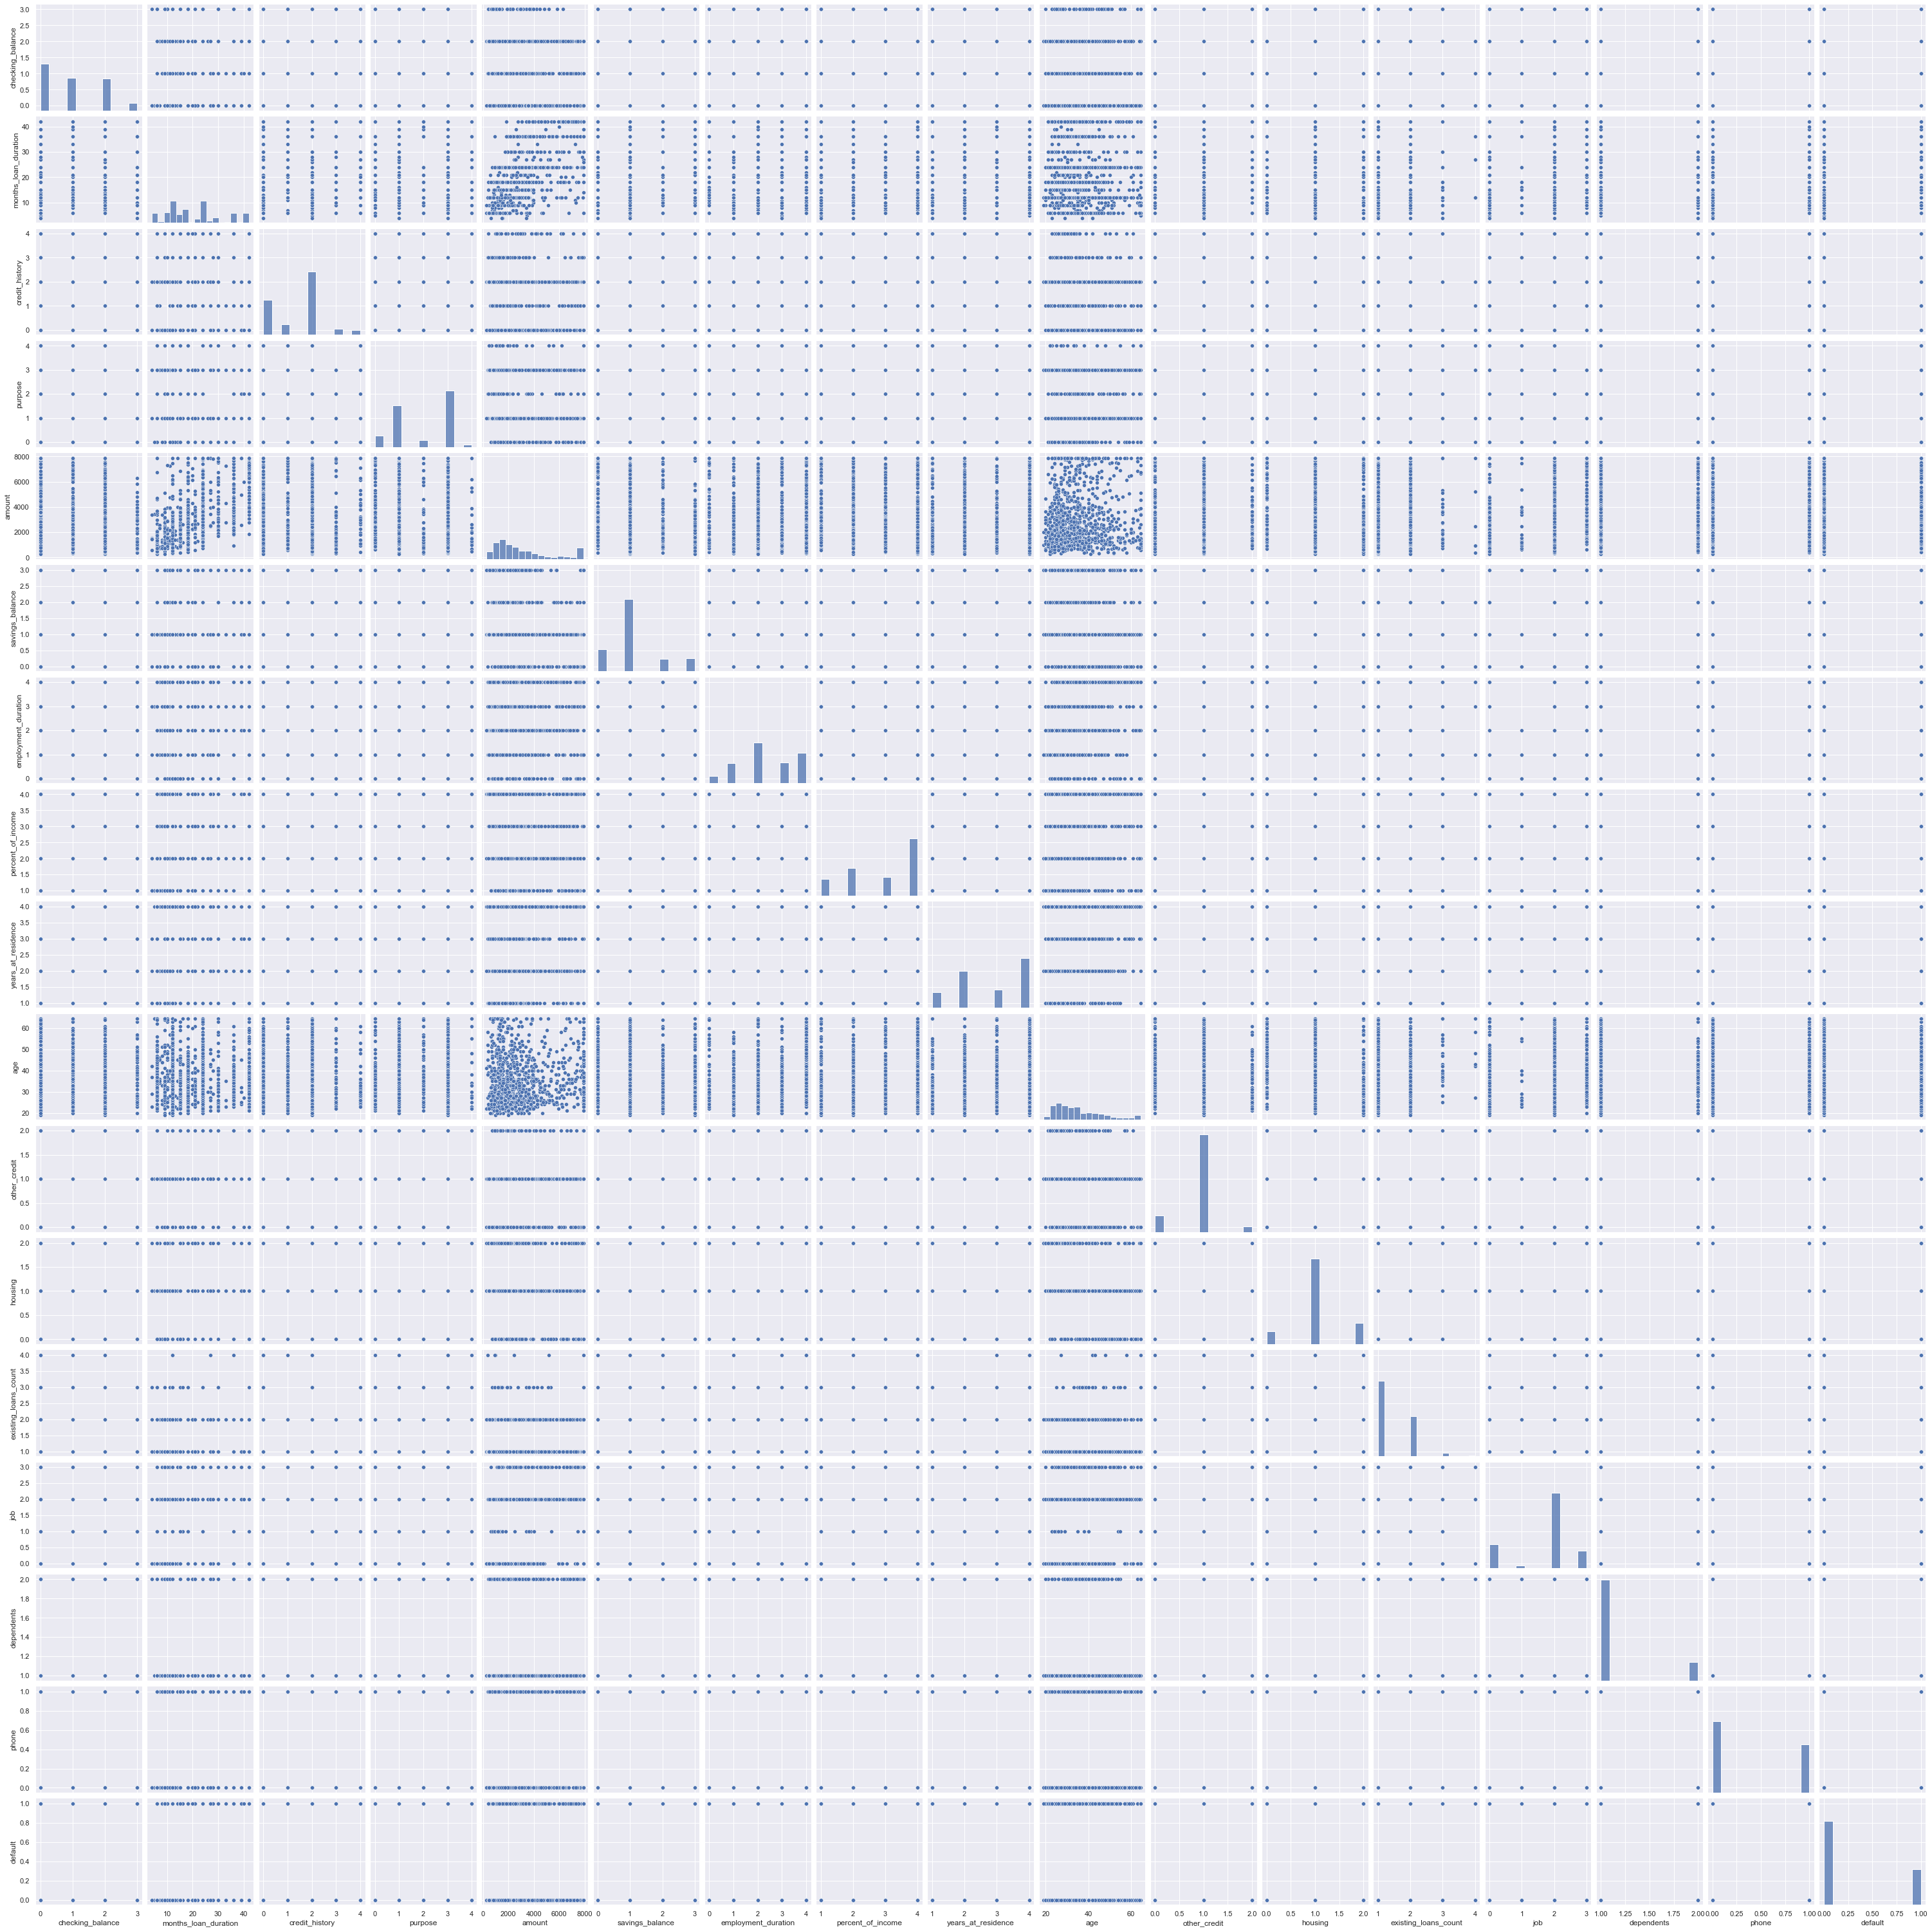

In [28]:
sns.pairplot(df)
plt.plot()
plt.show()

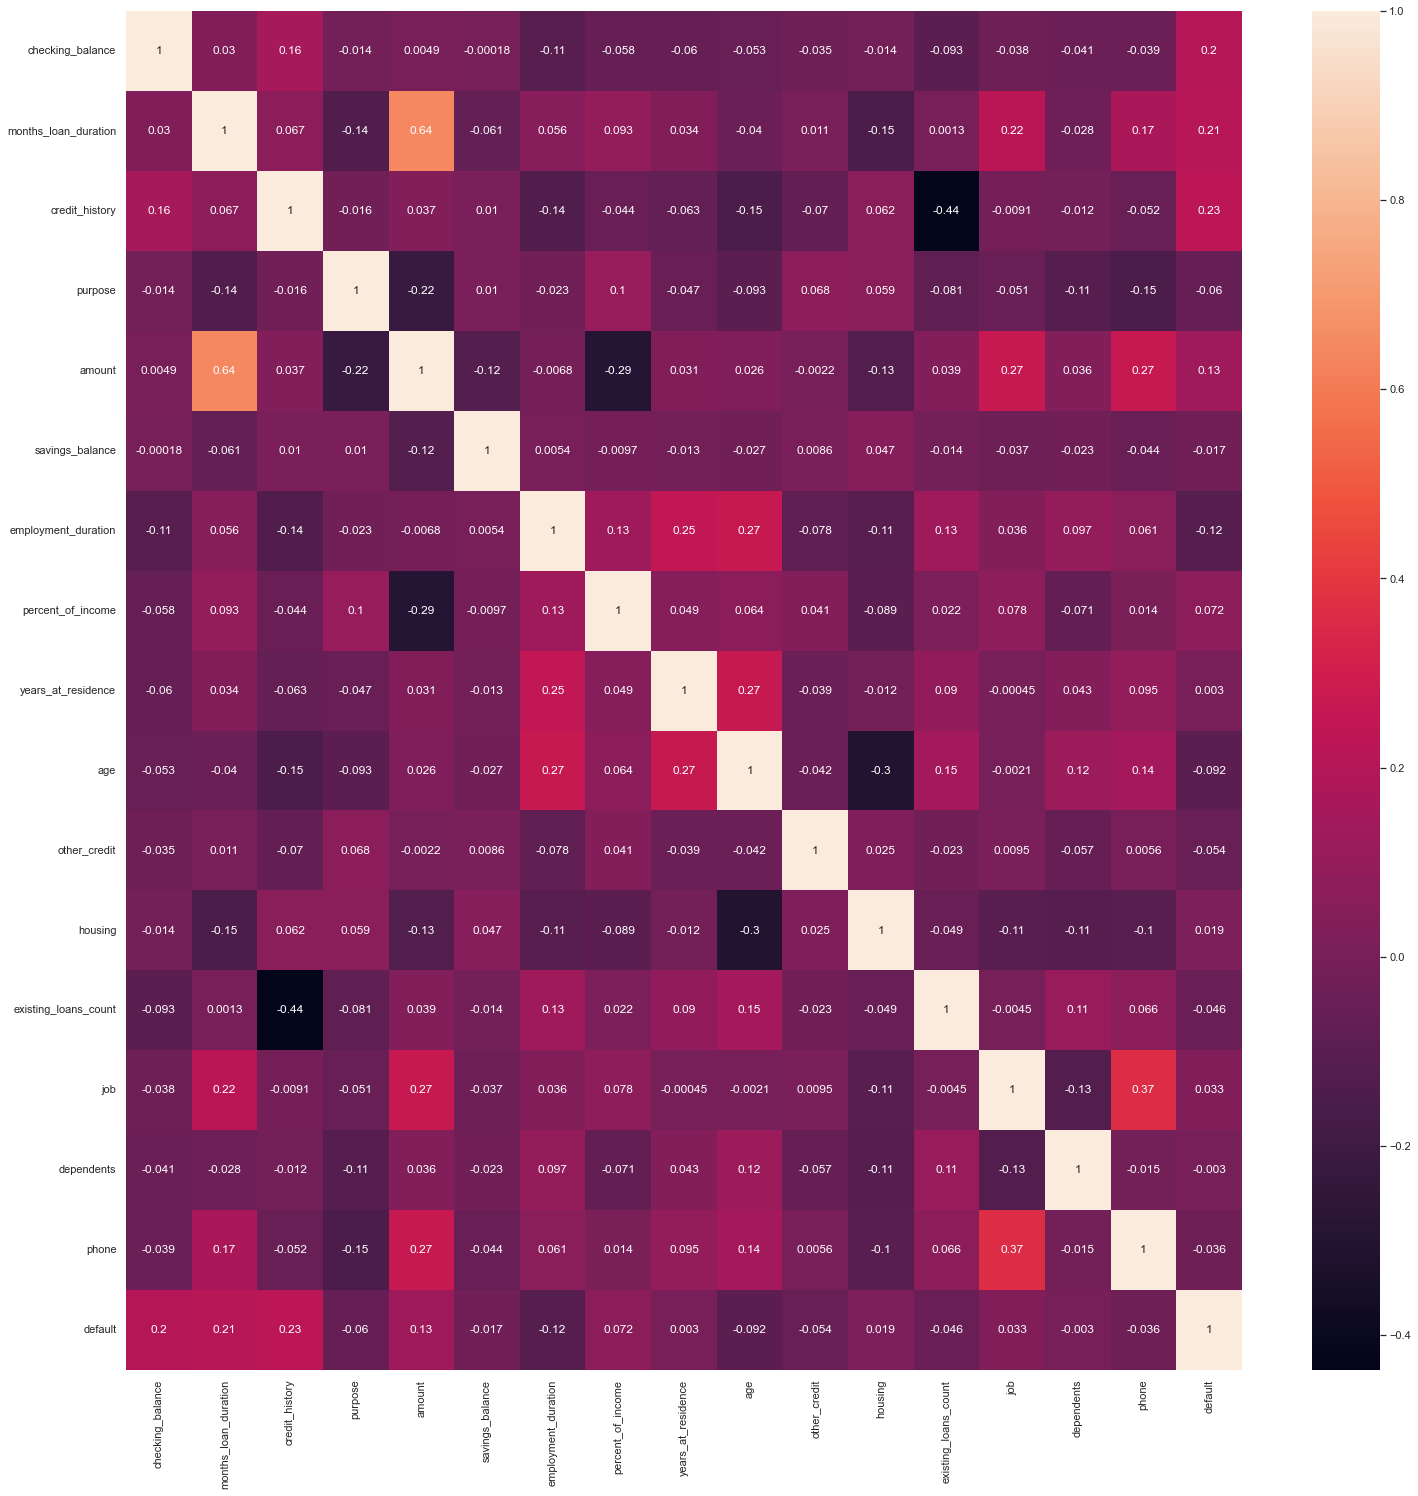

In [29]:
plt.figure(figsize = (25, 25))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [33]:
# Chi-Square Test of Independence
from sklearn.feature_selection import chi2

df_chi = df[catCol].copy()
y = df_chi["default"]
X = df_chi.drop("default", axis=1)

chisqr, p = chi2(X, y)

chi2DF = pd.DataFrame([X.columns, chisqr, p]).T
chi2DF.columns = ['Variable', 'chi2', 'p-value']
print(chi2DF.sort_values('p-value', ascending=False))

              Variable       chi2   p-value
6              housing   0.098217   0.75398
3      savings_balance   0.181636  0.669971
7                  job    0.55631  0.455751
5         other_credit   0.567233  0.451361
8                phone   0.792551   0.37333
2              purpose   2.348241  0.125424
4  employment_duration   8.232742  0.004114
0     checking_balance  35.758955       0.0
1       credit_history  42.160857       0.0


In [34]:
# VIF Test
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
df_vif = df.copy()
y = df_vif["default"]
X = df_vif.drop("default", axis=1)

dropped_list = []

while True:
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
    print(vif_data.sort_values("VIF", ascending=False))

    vif_max = vif_data.sort_values("VIF", ascending=False).reset_index(drop=True).loc[0,:]
    if vif_max['VIF'] > 5.0:
        f_name = vif_max['feature']
        X = X.drop(f_name, axis=1)
        print("\n Dropped --- ", f_name)
        dropped_list.append(f_name)
        continue
    else:
        break

                 feature        VIF
9                    age  12.631234
14            dependents  10.132508
7      percent_of_income  10.078957
1   months_loan_duration   9.562453
8     years_at_residence   8.518423
12  existing_loans_count   8.015956
4                 amount   6.996995
6    employment_duration   5.691265
10          other_credit   5.344244
13                   job   5.202866
11               housing   4.821312
3                purpose   3.985360
2         credit_history   3.297325
5        savings_balance   2.793766
0       checking_balance   2.112115
15                 phone   2.084275

 Dropped ---  age
                 feature       VIF
7      percent_of_income  9.746664
13            dependents  9.604987
1   months_loan_duration  9.448097
8     years_at_residence  7.790884
11  existing_loans_count  7.724284
4                 amount  6.890516
6    employment_duration  5.422340
9           other_credit  5.291396
12                   job  5.201057
10               ho

In [35]:
dropped_list

['age',
 'percent_of_income',
 'dependents',
 'months_loan_duration',
 'years_at_residence',
 'existing_loans_count']

### Imbalance Check

In [36]:
y.value_counts()
# Not Imbalance Dataset

0    700
1    300
Name: default, dtype: int64

In [37]:
X.columns

Index(['checking_balance', 'credit_history', 'purpose', 'amount',
       'savings_balance', 'employment_duration', 'other_credit', 'housing',
       'job', 'phone'],
      dtype='object')

In [38]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)

# Model Building

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score

def get_classifcation_metrics(model, X, y):
    plt.figure()

    y_pred = model.predict(X)
    y_true = y

    print("Accuracy Score: -- ", accuracy_score(y_true, y_pred))
    print("Balanced Accuracy Score: -- ", balanced_accuracy_score(y_true, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\n")

    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    plt.figure()
    sns.heatmap((confusion_matrix(y_true,y_pred)),annot=True,fmt='.5g',cmap='Blues');
    plt.xlabel('Predicted');
    plt.ylabel('Actuals',rotation=0);


    return ([balanced_accuracy_score(y_true, y_pred), accuracy_score(y_true, y_pred), 
           precision_score(y_true, y_pred), recall_score(y_true, y_pred), f1_score(y_true, y_pred)])

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve

def get_AUC_ROC(model, X, y):
    plt.figure()

    y_log_pred = model.predict_proba(X)[:,1]
    auc = roc_auc_score(y, y_log_pred)
    print('AUC: %.3f' % auc)

    fpr, tpr, thresholds = roc_curve(y,y_log_pred)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.show()

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#### Random Forest

In [45]:
rf = RandomForestClassifier(random_state=0).fit(X, y)

scores = cross_val_score(rf, X, y, cv=10, scoring="f1")
print("Cross Validation Scores: ",scores)

Cross Validation Scores:  [0.51851852 0.38461538 0.5        0.6122449  0.52830189 0.47826087
 0.38297872 0.59649123 0.5        0.61818182]


Train Accuracies: 
Accuracy Score: --  1.0
Balanced Accuracy Score: --  1.0
Confusion Matrix:
[[700   0]
 [  0 300]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       700
           1       1.00      1.00      1.00       300

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

AUC: 1.000


<Figure size 432x288 with 0 Axes>

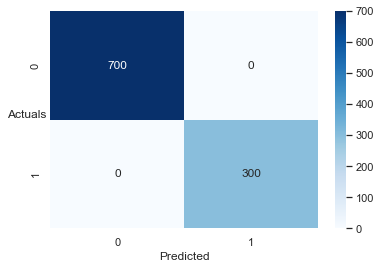

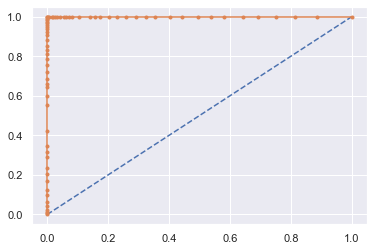

In [46]:
print("Train Accuracies: ")
rf_metrics = get_classifcation_metrics(rf, X, y)
get_AUC_ROC(rf, X, y)

### Improving Models

{'max_depth': 5, 'max_features': 4, 'max_samples': 500, 'n_estimators': 300}
Accuracy Score: --  0.775
Balanced Accuracy Score: --  0.645
Confusion Matrix:
[[679  21]
 [204  96]]


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       700
           1       0.82      0.32      0.46       300

    accuracy                           0.78      1000
   macro avg       0.79      0.65      0.66      1000
weighted avg       0.78      0.78      0.74      1000

AUC: 0.862


<Figure size 432x288 with 0 Axes>

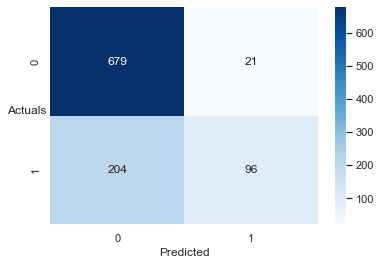

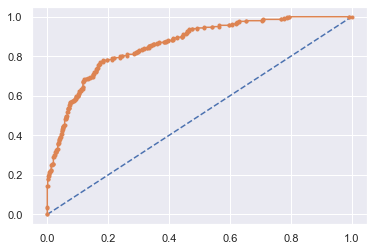

In [47]:
rf_parameters = {'n_estimators':(100, 300, 500), 'max_features':[4, 5], 'max_samples':[100, 500], 'max_depth':[4, 5, 6]}
rf_GS = GridSearchCV(rf, rf_parameters)
rf_GS.fit(X, y)
print(rf_GS.best_params_)

rf_GS_metrics = get_classifcation_metrics(rf_GS, X, y)
get_AUC_ROC(rf_GS, X, y)

In [48]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [49]:
p = ['checking_balance', 'credit_history', 'purpose', 'amount',
       'savings_balance', 'employment_duration', 'other_credit', 'housing',
       'job', 'phone']
imp_feature = pd.DataFrame.from_dict({"Feature Name":p, "Importance":rf.feature_importances_})
imp_feature.sort_values("Importance", ascending=False).reset_index(drop=True)

,Feature Name,Importance
0,amount,0.301104
1,checking_balance,0.141568
2,employment_duration,0.100587
3,credit_history,0.094395
4,purpose,0.079896
5,savings_balance,0.074557
6,job,0.063875
7,housing,0.054565
8,other_credit,0.048802
9,phone,0.040651


In [50]:
rf = RandomForestClassifier(max_depth=5, max_features=4, max_samples=500, n_estimators=300, random_state=0).fit(X, y)

scores = cross_val_score(rf, X, y, cv=10, scoring="f1")
print("Cross Validation Scores: ",scores)

Cross Validation Scores:  [0.3902439  0.25       0.44444444 0.41025641 0.31578947 0.27027027
 0.15789474 0.41860465 0.34146341 0.53333333]


In [ ]:
""" 
Exercise:
1) Use Train Test split to get testing data and train on training data
2) Use other models apart from Random Forest
3) Try other sets of hyper parameters to improve model performance
"""